In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def get_train():
    df = pd.read_csv('./data/data2021.student.csv').drop(['Class', 'ID'], axis=1)
    df = df.iloc[:1000]
    return df

/home/moritz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


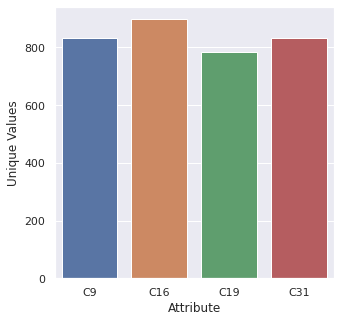

/home/moritz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


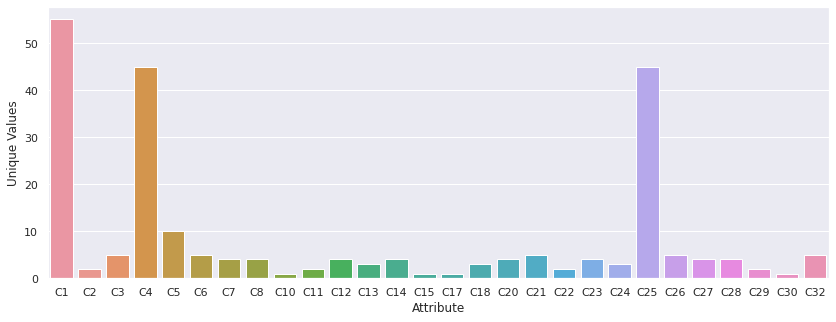

In [27]:
# Unique values
df = get_train()

unique = df.nunique()

unique_high = unique[unique > 100]
unique_low = unique[unique <= 100]
sns.set(rc={
    'figure.figsize':(len(unique_high)*1.25,5),
})
ax = sns.barplot(unique_high.index, unique_high.values, dodge=False)
ax.set(xlabel="Attribute", ylabel="Unique Values")
plt.show()

sns.set(rc={
    'figure.figsize':(len(unique_low)*0.5,5),
})
ax = sns.barplot(unique_low.index, unique_low.values, dodge=False)
ax.set(xlabel="Attribute", ylabel="Unique Values")
plt.show()

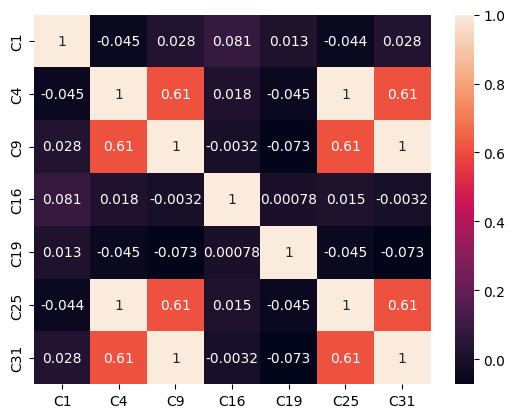

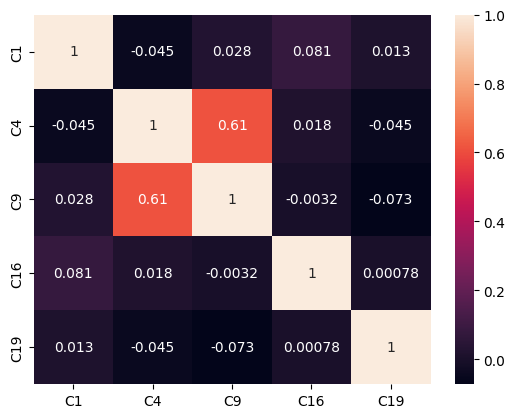

In [38]:
# Numeric Correlation Matrix
df = get_train()

# Convert attributes with less than threshold unique values to categorical
lt_cat_threshold_cols = [col for col in df.columns if df[col].nunique() <= 10]
df[lt_cat_threshold_cols] = df[lt_cat_threshold_cols].astype('category')

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

duplicate_cols = df.transpose().duplicated()
df = df.drop(list(df.columns[duplicate_cols]), axis=1)

sns.reset_defaults()
sns.heatmap(corr, annot=True)
plt.show()

# Dropping extremely highly correlated categories
import data_prep
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
high_cor_cols = data_prep._get_high_corr_cols(df[numeric_cols], 0.95)
df = df.drop(high_cor_cols, axis=1)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True)
plt.show()

/home/moritz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


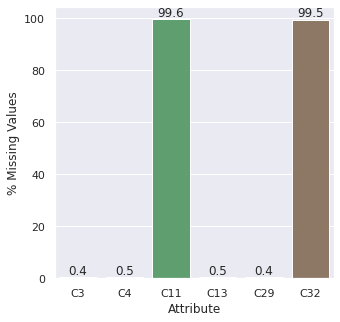

In [9]:
## Find missing values

df = pd.read_csv('./data/data2021.student.csv').drop(['Class', 'ID'], axis=1)

# Missing train data
df_train = df.iloc[:1000]
missing_train = df_train.isnull().sum()
missing_train = missing_train.apply(lambda x: (x/1000) * 100)
missing_train = missing_train.loc[missing_train != 0]
sns.set(rc={
    'figure.figsize':(5,5),
})
ax = sns.barplot(missing_train.index, missing_train.values)
ax.set(xlabel="Attribute", ylabel="% Missing Values")
ax.bar_label(ax.containers[0])
plt.show()

# ## Missing test data
# df_test = df.iloc[1000:]

# missing_test = df.isnull().sum()
# missing_test = missing_test.loc[missing_test != 0]
# missing_test = missing_test / len(df_test)
# sns.set(rc={
#     'figure.figsize':(5,5),
# })

# plot = sns.barplot(missing_test.index, missing_test.values)
# plot.bar_label(plot.containers[0])
# plt.show()

/home/moritz/.local/lib/python3.8/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


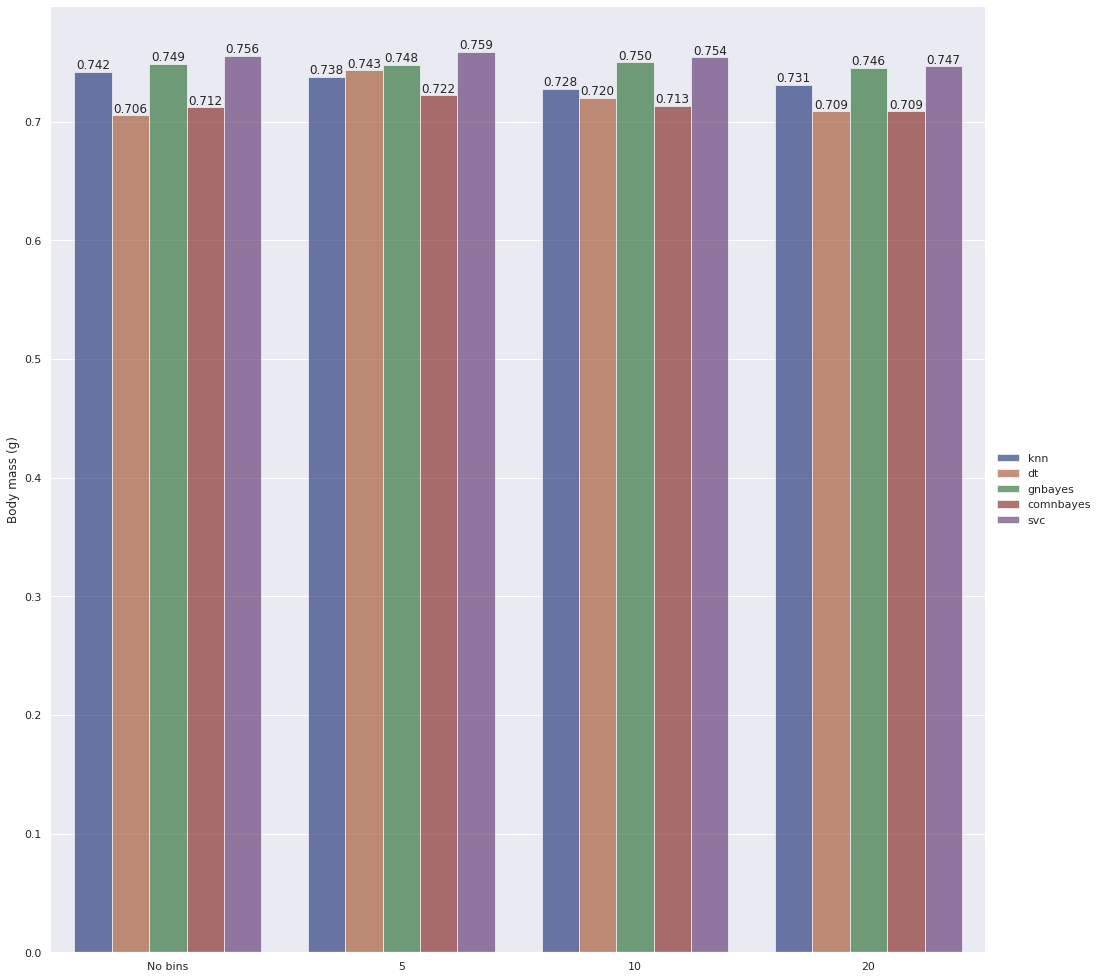

/home/moritz/.local/lib/python3.8/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


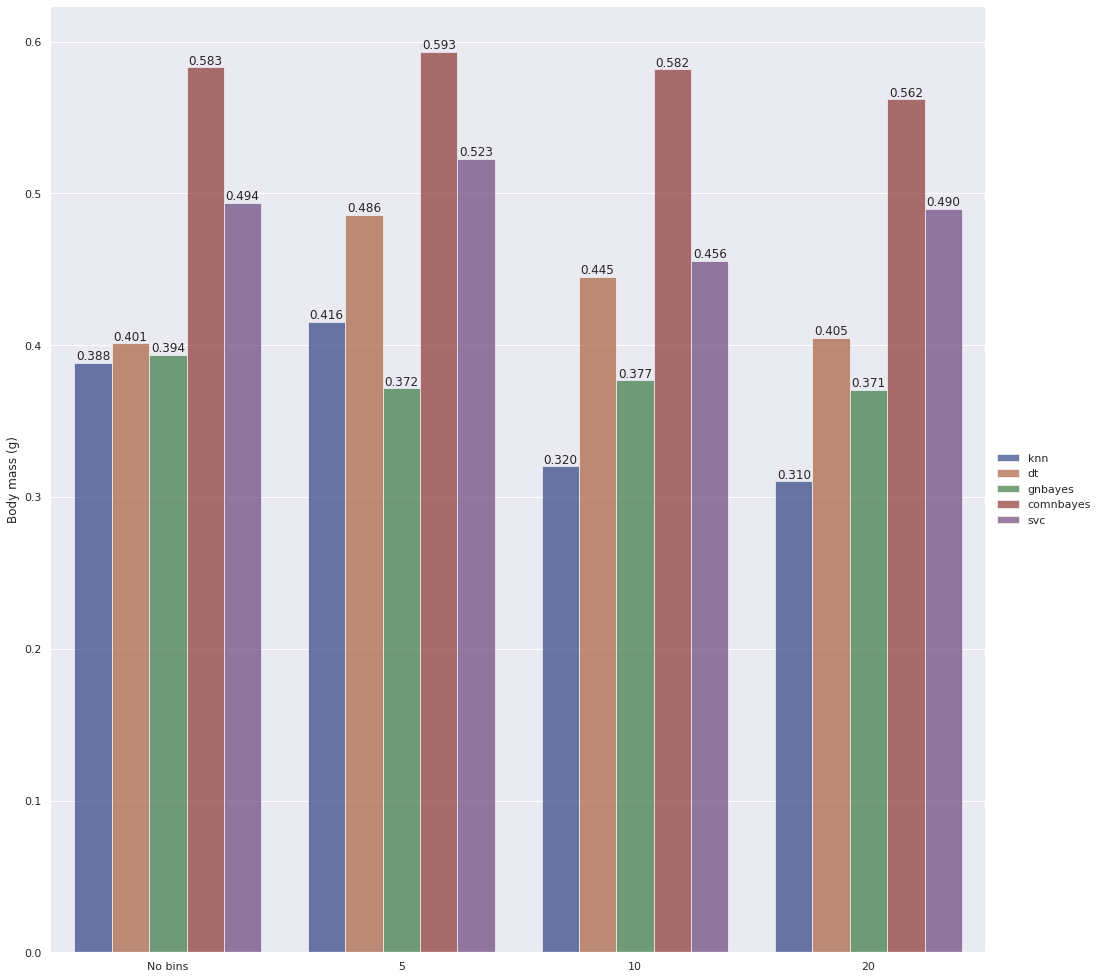

In [28]:
import pickle 
import seaborn as sns
from matplotlib import pyplot as plt

#####
## EXPERIMENT 1
#####

with open("./experiment_logs/experiment1.pickle", 'rb') as f:
    results = pickle.load(f)

sns.set(rc={
    'figure.figsize':(20,10),
})

## Best scores
g = sns.catplot(
    data=results, kind="bar",
    x="bins", y="best_score", hue="model",
    ci="sd", palette="dark", alpha=.6, height=6, size=14, 
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{v.get_height():.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

## F1 score
g = sns.catplot(
    data=results, kind="bar",
    x="bins", y="f1", hue="model",
    ci="sd", palette="dark", alpha=.6, height=6, size=14, 
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{v.get_height():.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()


/home/moritz/.local/lib/python3.8/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


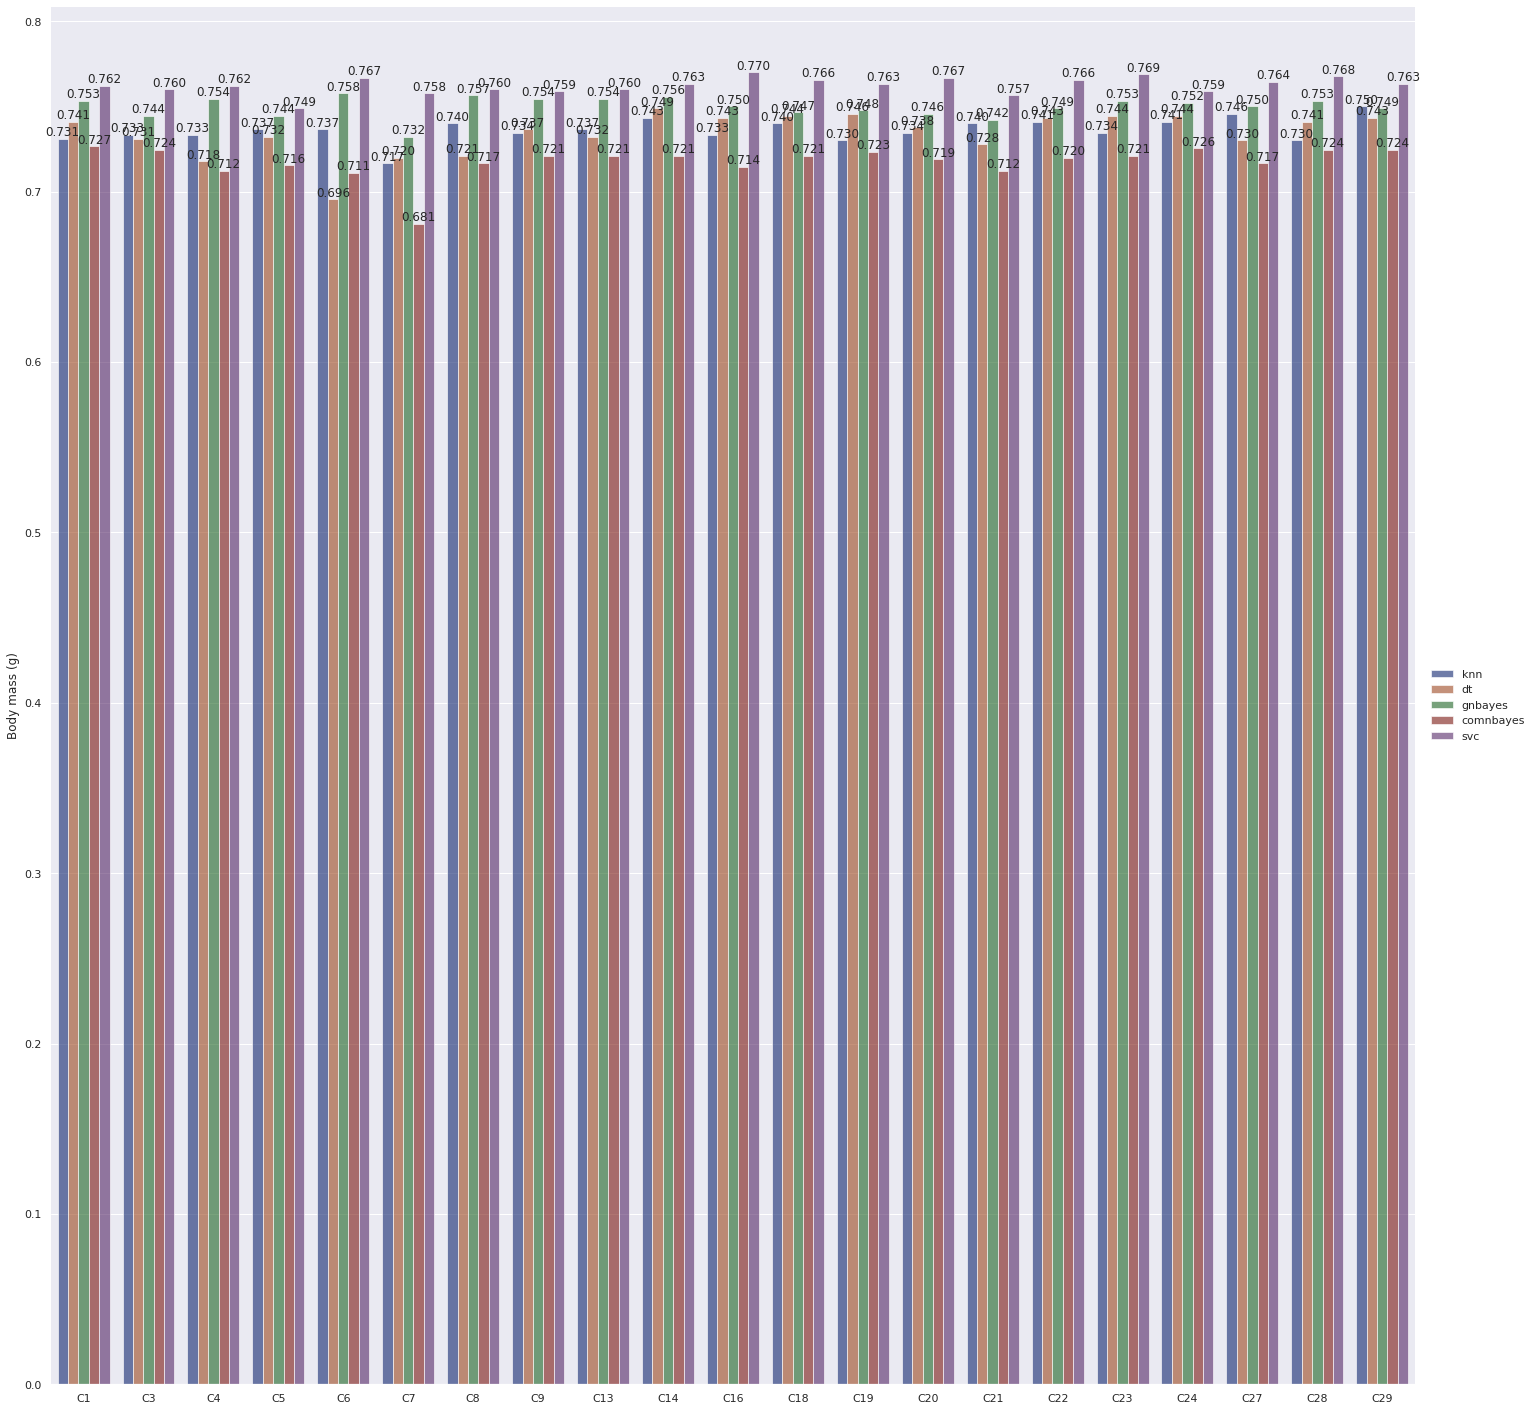

/home/moritz/.local/lib/python3.8/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


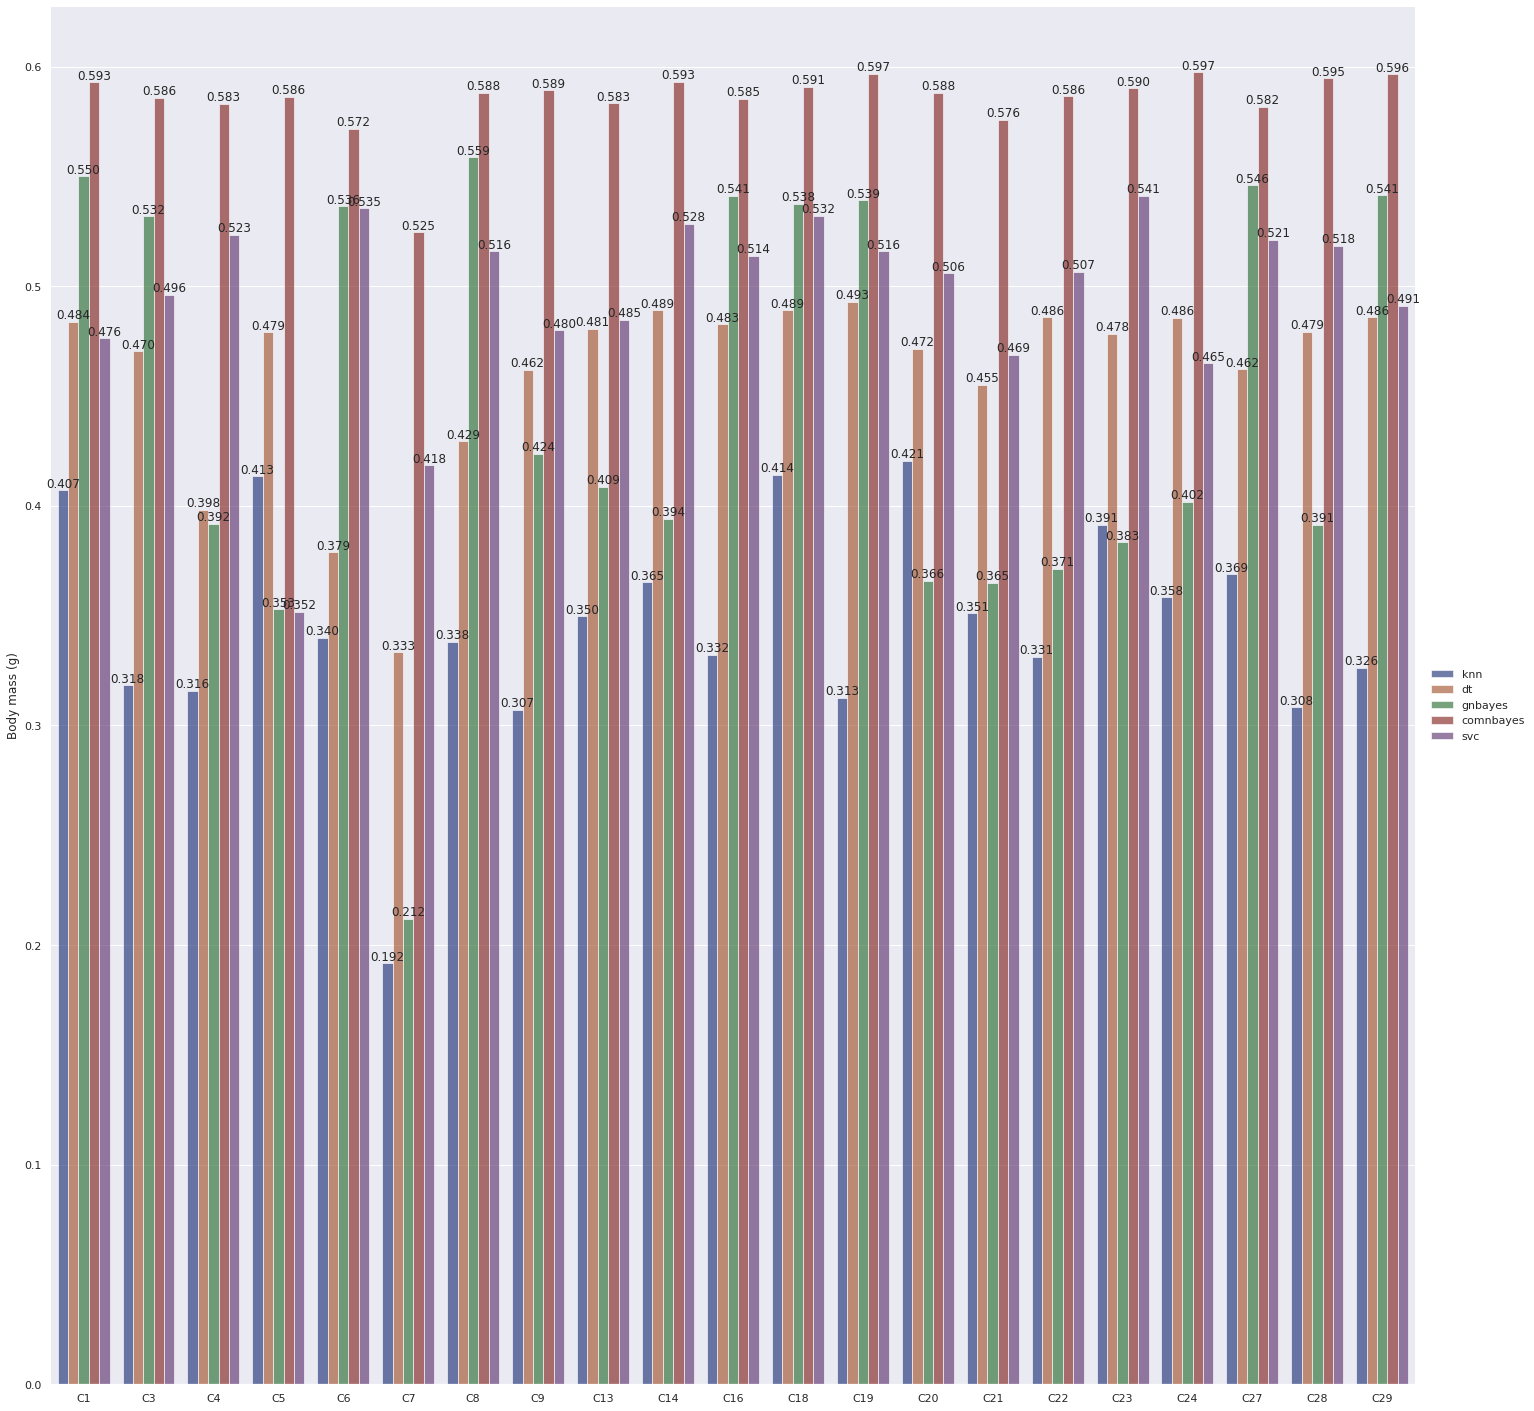

In [34]:
import pickle 
import seaborn as sns
from matplotlib import pyplot as plt

#####
## EXPERIMENT 1
#####

with open("./experiment_logs/experiment2.pickle", 'rb') as f:
    results = pickle.load(f)

sns.set(rc={
    'figure.figsize':(20,10),
})

## Best scores
g = sns.catplot(
    data=results, kind="bar",
    x="dropped_column", y="best_score", hue="model",
    ci="sd", palette="dark", alpha=.6, height=6, size=20, 
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{v.get_height():.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

## F1 score
g = sns.catplot(
    data=results, kind="bar",
    x="dropped_column", y="f1", hue="model",
    ci="sd", palette="dark", alpha=.6, height=6, size=20, 
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{v.get_height():.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()


In [5]:
import seaborn as sns

# p = sns.load_dataset('penguins')

# print(type(p))

import pandas as pd


results_table = pd.DataFrame(data=result_data, columns=["best_score", "f1", "bins", "model"])

print(results_table)

   best_score  f1  bins  model
0           1   2     3      4


In [60]:
#########################
## GENERATE PREDICTION ##
#########################
import pickle
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, KFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, QuantileTransformer, OrdinalEncoder
import data_prep

with open("./final/m=svc-s=smote-random-under-b=5,d=none.pickle", 'rb') as f:
    result:GridSearchCV = pickle.load(f)

df_train, df_test = data_prep.get_prepped_dataset(bins=5, normalize=True)
X = df_train.drop('Class', axis=1)
y = df_train['Class']
X_test = df_test.drop('Class', axis=1)

estimator = result.best_estimator_

estimator.fit(X, y)

y_test_id = list(pd.read_csv("./data/data2021.student.csv")[1000:]['ID'])


prediction = estimator.predict(X_test)
print(prediction)

y = LabelEncoder().fit_transform(y)

final_output = []

assert len(prediction) == len(y_test_id)

for ii in range(len(prediction)):
    final_output.append([y_test_id[ii], int(prediction[ii])])

final_output_table = pd.DataFrame(data=final_output, columns=["ID", "Predict"])

final_output_table.to_csv("my_test_prediction.csv", index=False)
# print(result.best_estimator_)

# np.average(cross_val_score(result.best_estimator_, X, y, cv=10, scoring='f1'))

[1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0.]
